# NAO example notebook

This notebook contains an example of access of ERA5 data with the `Reader` class and evaluation of the NAO teleconnection (station based index) with `aqua` libraries and an example of the plotting routines.

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../') # Hack to import from parent directory, to be removed
from index import station_based_index
from plots import index_plot, reg_plot
from tools import load_namelist

## Teleconnection details configuration

Details such as teleconnection coordinates, folder input/output are obtained with functions collected in the `tools.py` file, that access details from a `yaml` file.
The function `load_namelist` loads data specific to the choosen teleconnection such as coordinates.

Details about the NAO teleconnection can be accessed by specificing the teleconnection name as a string.
The field required to evaluate the teleconnection is also specified in the `namelist`. (WIP to be automatically fixed by the reader)

In [2]:
diagname  = 'teleconnections'
telecname = 'NAO'

namelist = load_namelist(diagname=diagname)

field = namelist[telecname]['field']

`namelist` contains now the detail about the teleconnections diagnostic.

## IFS tco1279

In [3]:
model = 'IFS'
exp = 'tco1279-orca025-cycle3'
source = '2D_monthly_native'

Data required for the NAO teleconnection are retrieved with the `Reader` class from the `AQUA` framework (see framework notebooks for a comprehensive list of examples).

In [4]:
reader_1279 = Reader(model=model,exp=exp,source=source,regrid='r025')

2023-06-01 13:27:55 :: Reader :: WARNING  -> No fixes available for model IFS, experiment tco1279-orca025-cycle3, source 2D_monthly_native


### Data preparation

The `Reader` returns a `Dataset`. It is needed to select the data for the desired variable and regrid before calling the library function.

In [5]:
data = reader_1279.retrieve(var=field)
infile = data[field]
infile = reader_1279.regrid(infile)

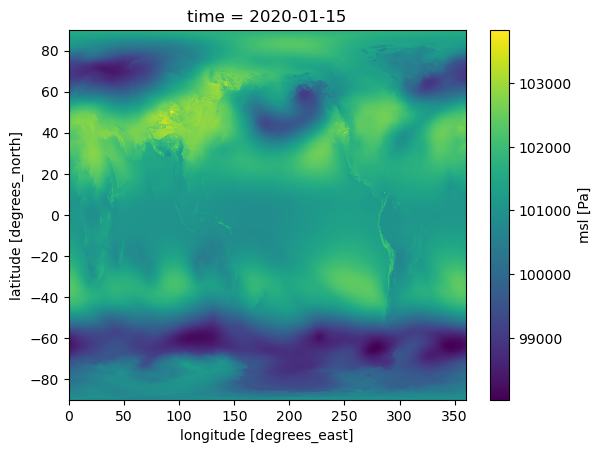

In [6]:
infile.isel(time=0).plot()

## Index evaluation

The NAO index can be evaluated by using the library function `station_based_index` from the `index.py` file.

The index can be evaluated with a custom rolling window to average data (standard is 3 months, here written explicitely for sake of clarity).

The function returns a `DataArray` with the timeserie of index values.

In [7]:
nao_1279 = station_based_index(infile,namelist,telecname,months_window=3)

The timeserie can be plot with the `index_plot` function from the `plots.py` file, already with some customization in order to make a nice plot.

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'NAO index'}, xlabel='time', ylabel='index'>)

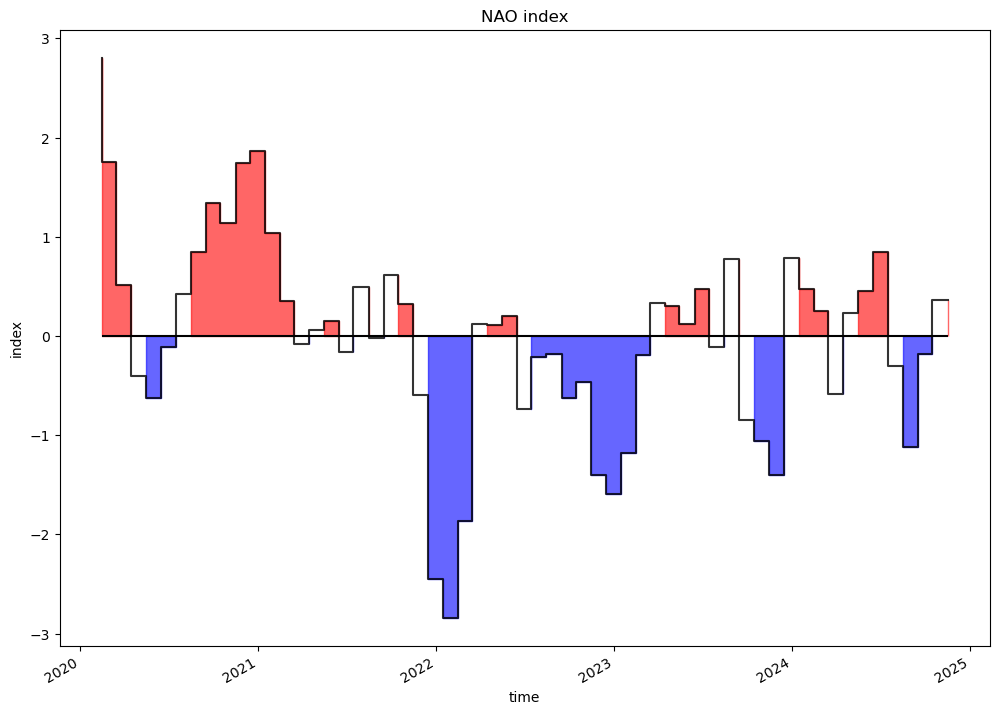

In [8]:
index_plot(nao_1279,title='NAO index',save=False,xlabel='time')

## Regression plot

To visualize the teleconnection on a 2D plot, functions in the `plots.py` are introduced.
There is an option `plot=True` that creates a plot of the regression. Additionally an xarray containing the result of the regression is returned, if needed for further analysis or storage.
A custom projection can be specified, here the `LambertConformal` projection is used.

(<xarray.DataArray (lat: 720, lon: 1440)>
 dask.array<truediv, shape=(720, 1440), dtype=float64, chunksize=(720, 1440), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
   * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8,
 <Figure size 800x400 with 2 Axes>,
 <GeoAxes: title={'center': 'NAO index'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>)

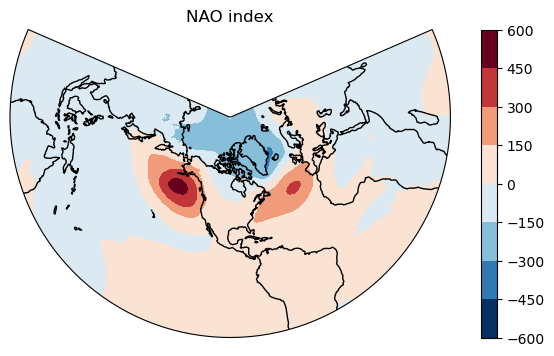

In [9]:
reg_plot(nao_1279,infile,save=False,projection_type='LambertConformal',title='NAO index',contour=True,levels=10)

# IFS 2559

In [10]:
model = 'IFS'
exp = 'tco2559-ng5-cycle3'
source = 'lra-r100-monthly'

In [11]:
reader_2559 = Reader(model=model,exp=exp,source=source)

2023-06-01 13:30:47 :: Reader :: WARNING  -> No fixes available for model IFS, experiment tco2559-ng5-cycle3, source lra-r100-monthly


In [12]:
data = reader_2559.retrieve(var=field)
infile = data[field]
infile

<xarray.DataArray 'msl' (time: 60, lat: 180, lon: 360)>
dask.array<concatenate, shape=(60, 180, 360), dtype=float64, chunksize=(12, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-15 2020-02-15 ... 2024-12-15
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes: (12/17)
    paramId:                    151
    dataType:                   fc
    numberOfPoints:             1038240
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   avg
    ...                         ...
    cfVarName:                  msl
    missingValue:               9999
    totalNumber:                0
    NV:                         0
    gridDefinitionDescription:  Latitude/Longitude Grid
    history:                    2023-05-29 14:44:25 resampled to frequency 1M...

In [14]:
nao_2559 = station_based_index(infile,namelist,telecname,months_window=3)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'NAO index'}, xlabel='time', ylabel='index'>)

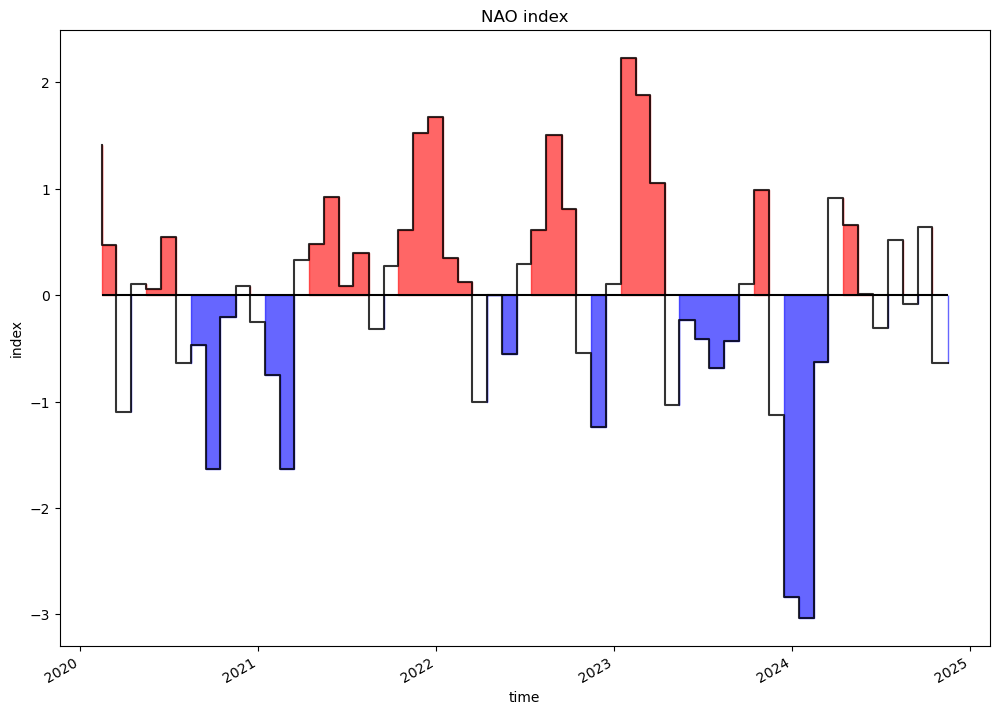

In [15]:
index_plot(nao_2559,title='NAO index',save=False,xlabel='time')

(<xarray.DataArray (lat: 180, lon: 360)>
 dask.array<truediv, shape=(180, 360), dtype=float64, chunksize=(180, 360), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
   * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0,
 <Figure size 800x400 with 2 Axes>,
 <GeoAxes: title={'center': 'NAO index'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>)

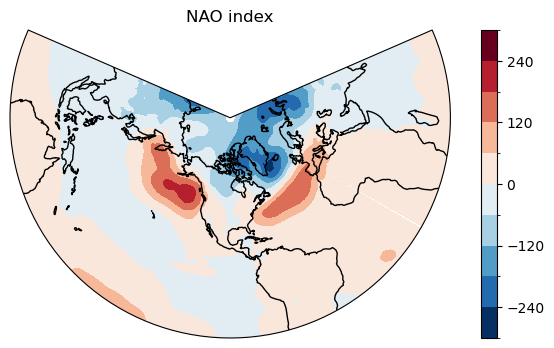

In [16]:
reg_plot(nao_2559,infile,save=False,projection_type='LambertConformal',title='NAO index',contour=True,levels=10)

# ICON 3026

In [22]:
model = 'ICON'
exp = 'ngc3026'
source = 'P1D'

In [30]:
reader_3026 = Reader(model=model,exp=exp,source=source,zoom=8,freq='monthly',regrid='r100')

In [32]:
data = reader_3026.retrieve(var=field)
infile = data[field]
infile = reader_3026.timmean(infile)
infile = reader_3026.regrid(infile)
infile

<xarray.DataArray 'msl' (time: 13, lat: 180, lon: 360)>
dask.array<reshape, shape=(13, 180, 360), dtype=float64, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-21 2020-02-01 ... 2021-01-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    cell_methods:  time: mean cell: mean
    component:     atmo
    grid_mapping:  crs
    long_name:     Mean sea level pressure
    units:         Pa
    vgrid:         meansea
    history:       2023-06-01 13:38:42 variable renamed by AQUA fixer;\n2023-...
    paramId:       151
    cfVarName:     msl
    shortName:     msl
    regridded:     1

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'NAO index'}, xlabel='time', ylabel='index'>)

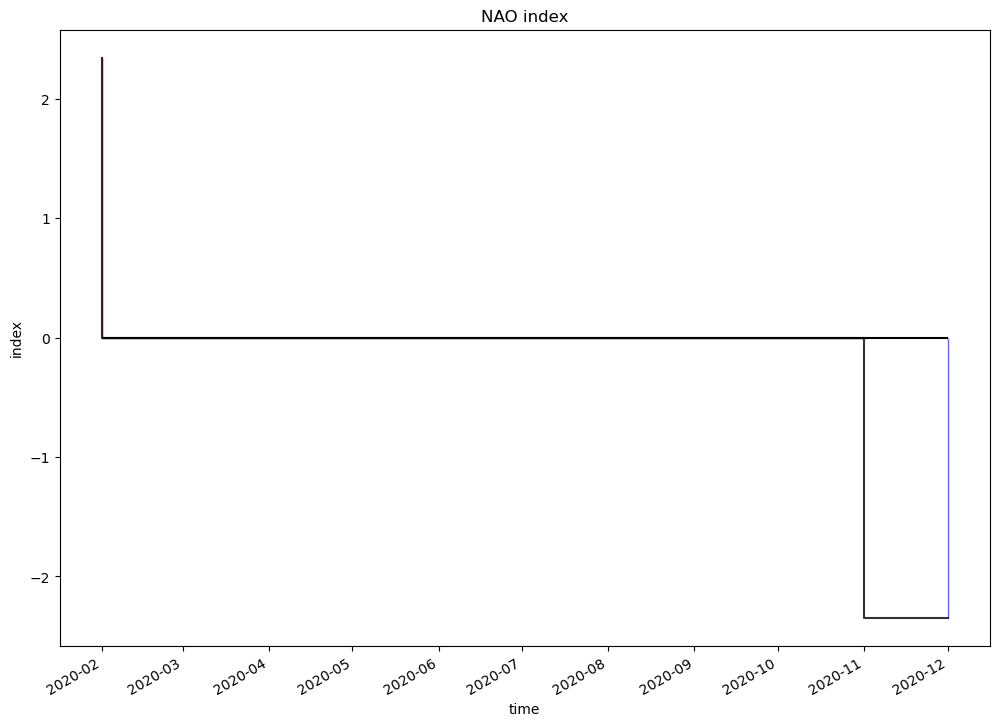

In [33]:
nao_3026 = station_based_index(infile,namelist,telecname,months_window=3)
index_plot(nao_3026,title='NAO index',save=False,xlabel='time')

(<xarray.DataArray (lat: 180, lon: 360)>
 dask.array<truediv, shape=(180, 360), dtype=float64, chunksize=(180, 360), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
   * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0,
 <Figure size 800x400 with 2 Axes>,
 <GeoAxes: title={'center': 'NAO index'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>)

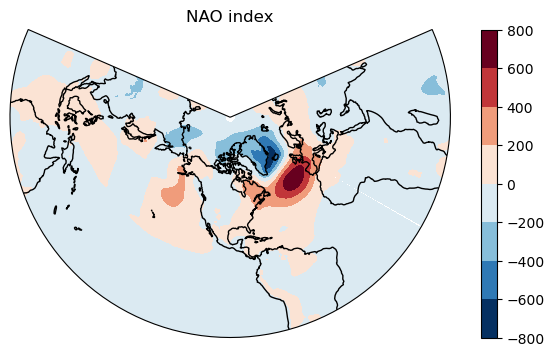

In [34]:
reg_plot(nao_3026,infile,save=False,projection_type='LambertConformal',title='NAO index',contour=True,levels=10)

# ICON 3028

In [3]:
model = 'ICON'
exp = 'ngc3028'
source = 'P1D'

In [5]:
reader_3028 = Reader(model=model,exp=exp,source=source,zoom=8,freq='monthly',regrid='r100')

In [42]:
data = reader_3028.retrieve(var=field)
infile = data[field]
infile = reader_3028.timmean(infile)
infile = reader_3028.regrid(infile)
infile

<xarray.DataArray 'msl' (time: 67, lat: 180, lon: 360)>
dask.array<reshape, shape=(67, 180, 360), dtype=float64, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-21 2020-02-01 ... 2025-07-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    cell_methods:  time: mean cell: mean
    component:     atmo
    grid_mapping:  crs
    long_name:     Mean sea level pressure
    units:         Pa
    vgrid:         meansea
    history:       2023-06-01 13:42:21 variable renamed by AQUA fixer;\n2023-...
    paramId:       151
    cfVarName:     msl
    shortName:     msl
    regridded:     1

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'NAO index'}, xlabel='time', ylabel='index'>)

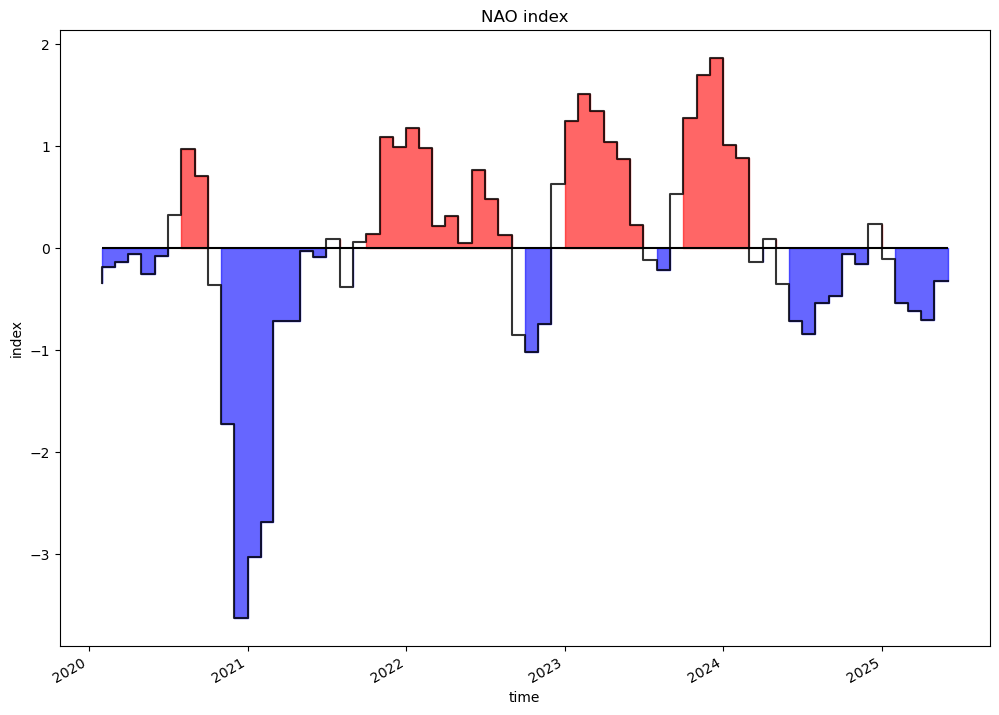

In [43]:
nao_3028 = station_based_index(infile,namelist,telecname,months_window=3)
index_plot(nao_3028,title='NAO index',save=False,xlabel='time')

(<xarray.DataArray (lat: 180, lon: 360)>
 dask.array<truediv, shape=(180, 360), dtype=float64, chunksize=(180, 360), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
   * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0,
 <Figure size 800x400 with 2 Axes>,
 <GeoAxes: title={'center': 'NAO index'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>)

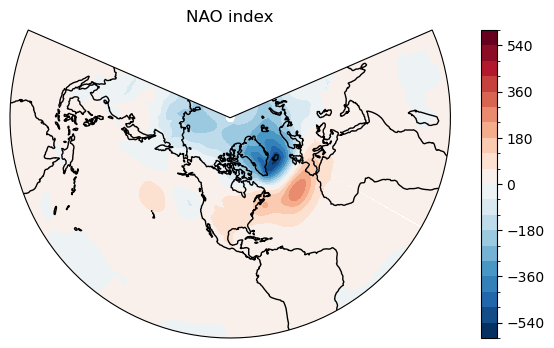

In [45]:
reg_plot(nao_3028,infile,save=False,projection_type='LambertConformal',title='NAO index',contour=True,levels=20)